# The Effect Cities have on Unemployment on Surrounding Areas

The dataset I'm using is an unemployment dataset from Kaggle. It has the rates of unemployment for each county in the United States for each month of the year from the year 1990 to 2016.

I wish to know if there is any substantial difference in states between cities when it comes to unemployment, if a city is more successful, does that in turn create poorer areas around it, like NY or Mumbai?

I am using Pandas to organize this dataset.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

I uploaded this datatset onto Jovian along with this file that you are currently looking at. You can find the dataset if you look at the toolbar and click 'File', 'Open...', and click on 'output.csv'. Alternatively you can go to Kaggle directly and grab it fomr where I got it originally.
https://www.kaggle.com/jayrav13/unemployment-by-county-us

Let us save and upload our work to Jovian before continuing.

In [1]:
project_name = "warrens-unemployment-project" # change this (use lowercase letters and hyphens only)

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name, files = ['output.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "warren-ball9/warrens-unemployment-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/warren-ball9/warrens-unemployment-project


'https://jovian.ai/warren-ball9/warrens-unemployment-project'

## Data Preparation and Cleaning

Since this is such a large dataset, we'll just use some general commands to feel out what it's like and see if there's anything wrong before we start making any serious operations on it.

Let's load up the csv file. As well as any other graphing tools we may need.

In [5]:
!pip install pandas matplotlib seaborn --upgrade --quiet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
unemployment_df = pd.read_csv('output.csv')

Just checking general things, like it's shape, any missing values, etc. Just so we know what we're working with.

In [7]:
unemployment_df

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6
...,...,...,...,...,...
885543,2009,November,Maine,Somerset County,10.5
885544,2009,November,Maine,Oxford County,10.5
885545,2009,November,Maine,Knox County,7.5
885546,2009,November,Maine,Piscataquis County,11.3


In [8]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885548 entries, 0 to 885547
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Year    885548 non-null  int64  
 1   Month   885548 non-null  object 
 2   State   885548 non-null  object 
 3   County  885548 non-null  object 
 4   Rate    885548 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.8+ MB


In [9]:
unemployment_df.describe()

,Year,Rate
count,885548.000000,885548.000000
mean,2003.000017,6.175010
std,7.824893,3.112535
min,1990.000000,0.000000
25%,1996.000000,4.000000
50%,2003.000000,5.500000
75%,2010.000000,7.700000
max,2016.000000,58.400000


In [10]:
unemployment_df.columns

Index(['Year', 'Month', 'State', 'County', 'Rate'], dtype='object')

In [11]:
unemployment_df.shape

(885548, 5)

Let's also check if it includes all 50 states.

In [12]:
all_states = unemployment_df.State.unique()

all_states

array(['Mississippi', 'Oklahoma', 'Delaware', 'Minnesota', 'Illinois',
       'Arkansas', 'New Mexico', 'Indiana', 'Maryland', 'Louisiana',
       'Idaho', 'Wyoming', 'Tennessee', 'Arizona', 'Iowa', 'Kansas',
       'Utah', 'Virginia', 'Oregon', 'Connecticut', 'Montana',
       'California', 'Massachusetts', 'West Virginia', 'South Carolina',
       'New Hampshire', 'Wisconsin', 'Vermont', 'North Dakota',
       'Pennsylvania', 'Kentucky', 'Hawaii', 'Nebraska', 'Missouri',
       'Ohio', 'Alabama', 'Rhode Island', 'South Dakota', 'Colorado',
       'New Jersey', 'Washington', 'North Carolina', 'New York', 'Texas',
       'Nevada', 'Maine', 'Michigan'], dtype=object)

Oddly enough, it doesn't, it appears to be missing Florida and Georgia. We'll just have to work around that, and take some of our findings with a grain of salt.

It also appears that it's not organized by year, or month, rate. Perhaps by State, but not alphabetically, at least. Thankfully, I won't be needing this entire dataset, I'll only be using data from the most recent year. Unfortuneately, we can't tell this by looking at the top or bottom 10 of the dataset, so we'll use .max(). We'll also make it a copy, since we may want to modify this new dataframe.

In [13]:
#only keeping 2016
recent_year_df = unemployment_df[unemployment_df.Year == unemployment_df.Year.max()].copy()


Okay, before we do anything, we need to organize it in some way. By month will be fine. However, since the months aren't in a date format, we'll have to convert it to numbers and organize it that way.

In [14]:
#we'll make a dictionary of all the months and give a corresponding number
month_converter = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8,
                   "September":9, "October":10, "November":11, "December":12}
#now create a Series using the months
month_add_on = recent_year_df.Month.map(month_converter)
#now add on the number months
recent_year_df['number_month'] = month_add_on
#finally sort the whole thing by the number months
recent_year_df = recent_year_df.sort_values(by = ['number_month', 'State', 'County'], ascending = True)
recent_year_df

,Year,Month,State,County,Rate,number_month
84337,2016,January,Alabama,Autauga County,5.4,1
84399,2016,January,Alabama,Baldwin County,6.0,1
84386,2016,January,Alabama,Barbour County,9.0,1
84370,2016,January,Alabama,Bibb County,7.1,1
84385,2016,January,Alabama,Blount County,5.8,1
...,...,...,...,...,...,...
94322,2016,December,Wyoming,Sweetwater County,5.3,12
94341,2016,December,Wyoming,Teton County,3.6,12
94343,2016,December,Wyoming,Uinta County,5.1,12
94342,2016,December,Wyoming,Washakie County,4.1,12


Okay, much better. With everything reasonably organized, we can start.

## Exploratory Analysis and Visualization

Before we start asking any questions about unemployment, let's find the average to get a feel of what unemployment is like in a general sense.

In [15]:
recent_year_df.Rate.mean()

5.1606803474610805

Alright, about 5.16%. Now we have a general idea of what an expected unemployment rate looks like.

## Asking and Answering Questions

Now that we've organized and set a baseline for unemployment, we can start asking and questions and running data to find results.

The first question I wish to know is if cities makes the unemployment worse in the surrounding areas due to "brain drain", an economic theory that the most productive and brightest people from an area would move to a richer area with more opportunites, rather than staying in their home towns or countries, thereby giving the richer area an even greater variety of talented people. We'll use New York City to help with this question.

In [16]:
# we'll grab the most recent month
recent_month_df = recent_year_df[recent_year_df.Month == "December"]

In [17]:
recent_NY_df = recent_month_df[recent_month_df.State == "New York"]

recent_NY_df

,Year,Month,State,County,Rate,number_month
96211,2016,December,New York,Albany County,3.8,12
96196,2016,December,New York,Allegany County,5.6,12
96201,2016,December,New York,Bronx County,6.2,12
96189,2016,December,New York,Broome County,5.4,12
96212,2016,December,New York,Cattaraugus County,6.1,12
...,...,...,...,...,...,...
96217,2016,December,New York,Washington County,4.9,12
96176,2016,December,New York,Wayne County,5.2,12
96207,2016,December,New York,Westchester County,4.0,12
96178,2016,December,New York,Wyoming County,6.1,12


In [18]:
recent_NY_df.sort_values('Rate', ascending = False)


,Year,Month,State,County,Rate,number_month
96233,2016,December,New York,Hamilton County,9.2,12
96194,2016,December,New York,Lewis County,7.8,12
96181,2016,December,New York,Jefferson County,7.0,12
96195,2016,December,New York,Oswego County,6.7,12
96183,2016,December,New York,Schuyler County,6.5,12
...,...,...,...,...,...,...
96190,2016,December,New York,Saratoga County,3.8,12
96211,2016,December,New York,Albany County,3.8,12
96214,2016,December,New York,Nassau County,3.6,12
96227,2016,December,New York,Columbia County,3.6,12


In [19]:
current_county = recent_NY_df[recent_NY_df.County == "New York County"]
current_county

,Year,Month,State,County,Rate,number_month
96205,2016,December,New York,New York County,3.9,12


In [20]:
current_county = recent_NY_df[recent_NY_df.County == "Bronx County"]
current_county

,Year,Month,State,County,Rate,number_month
96201,2016,December,New York,Bronx County,6.2,12


Now that is immediately interesting, Bronx is 2.3% higher. This by itself doesn't seem very conclusive, though. First of all, let's find the average unemployment of the US in the month of December, just so we have a more accurate standard.

In [21]:
recent_month_df.Rate.mean()

4.96221837088388

So at that time, Manhattan, which is located in New York County, was below the national unemployment at the time, by 1%. Whilst neighboring Bronx was above the national rate by 1.3%. Let's look at a span of months between these 2 counties. To see how their respective unemployment rates correlated at all.

In [22]:
# let's look over the whole year
only_NY_County_df = recent_year_df[recent_year_df.County == "New York County"]
only_Bronx_County_df = recent_year_df[recent_year_df.County == "Bronx County"]
only_NY_County_df_copy = only_NY_County_df.copy()
only_Bronx_County_df_copy = only_Bronx_County_df.copy()


Thankfully, it's already organized by month. So all we must do is set the index by month so our graphs make sense.

In [23]:
only_NY_County_df_copy.set_index('number_month', inplace = True)
only_Bronx_County_df_copy.set_index('number_month', inplace = True)

In [24]:
only_NY_County_df_copy

,Year,Month,State,County,Rate
number_month,,,,,
1,2016,January,New York,New York County,5.1
2,2016,February,New York,New York County,5.1
3,2016,March,New York,New York County,5.0
4,2016,April,New York,New York County,4.2
5,2016,May,New York,New York County,3.9
6,2016,June,New York,New York County,4.4
7,2016,July,New York,New York County,4.8
8,2016,August,New York,New York County,4.9
9,2016,September,New York,New York County,5.1


In [25]:
only_Bronx_County_df_copy

,Year,Month,State,County,Rate
number_month,,,,,
1,2016,January,New York,Bronx County,8.1
2,2016,February,New York,Bronx County,8.1
3,2016,March,New York,Bronx County,7.9
4,2016,April,New York,Bronx County,6.6
5,2016,May,New York,Bronx County,6.1
6,2016,June,New York,Bronx County,7.0
7,2016,July,New York,Bronx County,7.7
8,2016,August,New York,Bronx County,7.8
9,2016,September,New York,Bronx County,7.8


A line graph will help with these new charts.

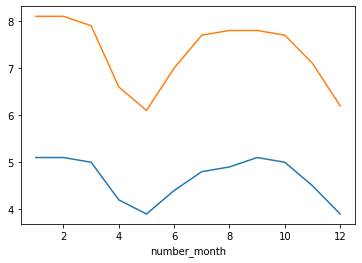

In [26]:
only_NY_County_df_copy.Rate.plot();
only_Bronx_County_df_copy.Rate.plot();

Well, that's very unexpected. Other than the fact that Brooklyn has consistently higher unemployment, the patterns are very similar. Though Bronx has slightly more drastic dips and peaks. If my theory of brain drain were correct, I would expect that as unemployment went down in NY County, indicating more opportunites, it would go up in the Bronx. Let's try Queens since it's also close to both counties. If they are all consistent, it is probably the case that these fluctuations are from a higher economic cause.

In [27]:
only_Queens_County_df = recent_year_df[recent_year_df.County == "Queens County"]
only_Queens_County_df_copy = only_Queens_County_df.copy()

only_Queens_County_df_copy.set_index('number_month', inplace = True)

In [28]:
only_Queens_County_df_copy

,Year,Month,State,County,Rate
number_month,,,,,
1,2016,January,New York,Queens County,5.2
2,2016,February,New York,Queens County,5.2
3,2016,March,New York,Queens County,5.0
4,2016,April,New York,Queens County,4.2
5,2016,May,New York,Queens County,3.8
6,2016,June,New York,Queens County,4.4
7,2016,July,New York,Queens County,4.9
8,2016,August,New York,Queens County,5.0
9,2016,September,New York,Queens County,5.1


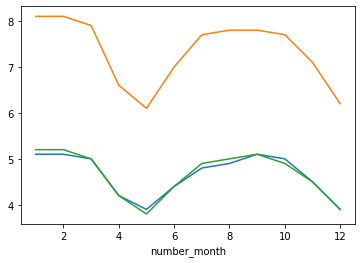

In [29]:
only_NY_County_df_copy.Rate.plot();
only_Bronx_County_df_copy.Rate.plot();
only_Queens_County_df_copy.Rate.plot();

It appears Queens is even more identical to NY county. I guess that makes my question of brain drain inconclusive, since I can't tell if that actually contributed to the Bronx's higher unemployment in some way. However, this does lead to another question. To what degreee does a city have influence over the unemployment rates of its surrounding counties?
Perhaps unemployment is mostly a local phenomena,  or it could be the case that a city has a large role the unemployment of its surrounding areas. Let's look at the city of Houston, TX. Which is located moslty in Harris County.

And a few adjacent counties, Galveston, Montgomery, and Fort Bend.

In [30]:
recent_TX_df = recent_month_df[recent_month_df.State == "Texas"]

recent_TX_df

,Year,Month,State,County,Rate,number_month
96318,2016,December,Texas,Anderson County,4.0,12
96476,2016,December,Texas,Andrews County,4.3,12
96359,2016,December,Texas,Angelina County,6.0,12
96347,2016,December,Texas,Aransas County,6.0,12
96485,2016,December,Texas,Archer County,4.0,12
...,...,...,...,...,...,...
96317,2016,December,Texas,Wood County,5.3,12
96486,2016,December,Texas,Yoakum County,4.3,12
96420,2016,December,Texas,Young County,4.4,12
96259,2016,December,Texas,Zapata County,9.8,12


In [31]:
recent_TX_df[recent_TX_df.County == "Harris County"]

,Year,Month,State,County,Rate,number_month
96319,2016,December,Texas,Harris County,5.3,12


In [32]:
recent_TX_df[recent_TX_df.County == "Galveston County"]

,Year,Month,State,County,Rate,number_month
96296,2016,December,Texas,Galveston County,5.6,12


In [33]:
recent_TX_df[recent_TX_df.County == "Fort Bend County"]

,Year,Month,State,County,Rate,number_month
96390,2016,December,Texas,Fort Bend County,5.1,12


In this case, none of the adjacent counties to Harris have radically different unemployment rates. Let's see if, similar to New York County, the rates of unemployment move in a similar pattern.

In [34]:
Harris_df = recent_year_df[recent_year_df.County == "Harris County"].copy()
Galveston_df = recent_year_df[recent_year_df.County == "Galveston County"].copy()
Fort_Bend_df = recent_year_df[recent_year_df.County == "Fort Bend County"].copy()


Harris_df.set_index('number_month', inplace = True)
Galveston_df.set_index('number_month', inplace = True)
Fort_Bend_df.set_index('number_month', inplace = True)

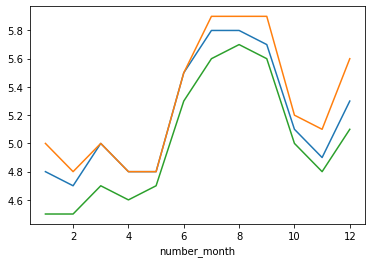

In [35]:
Harris_df.Rate.plot();
Galveston_df.Rate.plot();
Fort_Bend_df.Rate.plot();

We have similar results as we had for New York. And the pattern is mostly different than the patterns for the New York area. However, in this case, there isn't a county that is consistenetly higher than Harris. To get a more conclusive answer, we would need a random area that has no cities at all. And see the surrounding counties there. If the counties move similarly, it may be more likely that economic activity is more localized without any particular county causing it. However if the counties are different, we can say that cities do have an effect on it's surrounding counties. Let's do Arizona, since it doesn't have many counties and is therefore easier to research.

I'll choose Mohave county since there's no city in it and its adjacent counties don't have a population exceeding 300,000.

In [36]:
recent_AZ_df = recent_month_df[recent_month_df.State == "Arizona"]

recent_AZ_df

,Year,Month,State,County,Rate,number_month
94450,2016,December,Arizona,Apache County,10.4,12
94452,2016,December,Arizona,Cochise County,5.4,12
94451,2016,December,Arizona,Coconino County,6.0,12
94445,2016,December,Arizona,Gila County,6.6,12
94448,2016,December,Arizona,Graham County,5.6,12
94441,2016,December,Arizona,Greenlee County,6.0,12
94442,2016,December,Arizona,La Paz County,5.3,12
94446,2016,December,Arizona,Maricopa County,4.0,12
94443,2016,December,Arizona,Mohave County,6.0,12
94447,2016,December,Arizona,Navajo County,7.7,12


Huh, just by looking at this, I can see that Apache and Yuma are outliers. In fact, all of these counties, besides Pima, Maricopa, Yavapai, and Pinal, are above the average national unemployment at the time, which was 4.9%. That's really unfortunate. It's hard to imagine what would make nearly an entire state have an above-average unemployment rate. Actually, Arizona borders California. Perhaps I've been looking too close. Perhaps unemployment more affects state borders than county borders.
Let's follow this up after we look at the counties, though.

In [37]:
Mohave_df = recent_year_df[recent_year_df.County == "Mohave County"].copy()
Coconino_df = recent_year_df[recent_year_df.County == "Coconino County"].copy()
Yavapai_df = recent_year_df[recent_year_df.County == "Yavapai County"].copy()


Mohave_df.set_index('number_month', inplace = True)
Coconino_df.set_index('number_month', inplace = True)
Yavapai_df.set_index('number_month', inplace = True)

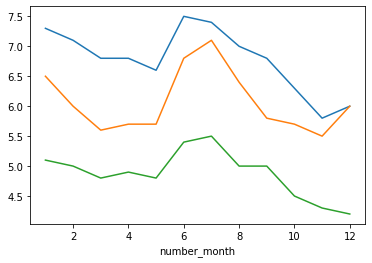

In [38]:
Mohave_df.Rate.plot();
Coconino_df.Rate.plot();
Yavapai_df.Rate.plot();

Alright, the unemployment rates are relatively similar, but definetely not as similar as NYC and Harris, so perhaps it is the case that economic activity is both a local phenomina and that cities can definetely influence the surrounding counties.

Now we can get to our next question. We'll start by taking the average of the counties of AZ to get a state average, then the same for California, and see if there is a significant difference between unemployment. We'll do the same for NY and PA, then TX and OK. Just for the sake of building on our previous data.

In [39]:
recent_CA_df = recent_month_df[recent_month_df.State == "California"]
print(recent_AZ_df.Rate.mean(), recent_CA_df.Rate.mean(), '\n')

recent_PA_df = recent_month_df[recent_month_df.State == "Pennsylvania"]
print(recent_PA_df.Rate.mean(), recent_NY_df.Rate.mean(), '\n')

recent_OK_df = recent_month_df[recent_month_df.State == "Oklahoma"]
print(recent_OK_df.Rate.mean(), recent_TX_df.Rate.mean(), '\n')

6.6866666666666665 6.767241379310345 

5.526865671641791 5.125806451612903 

5.029870129870133 5.065354330708661 



It doesn't seem that the states that contain large cities have smaller unemployment than it's neighboring states. In fact it turn out that the average unemployment is higher in California than Arizona. I guess the answer for this question is also inconclusive.

In [40]:
import jovian

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "warren-ball9/warrens-unemployment-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/warren-ball9/warrens-unemployment-project


'https://jovian.ai/warren-ball9/warrens-unemployment-project'

In [42]:
import jovian

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "warren-ball9/warrens-unemployment-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/warren-ball9/warrens-unemployment-project


'https://jovian.ai/warren-ball9/warrens-unemployment-project'

Let us save and upload our work to Jovian before continuing.

In [44]:
import jovian

In [45]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "warren-ball9/warrens-unemployment-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/warren-ball9/warrens-unemployment-project


'https://jovian.ai/warren-ball9/warrens-unemployment-project'

## Inferences and Conclusion

Well, all my questions were inconclusive and the data set I used was missing a couple states. But this is what I expected more or less, what with working with such a large dataset and asking some general questions. This was more just to get a better idea of how unemployment worked. And I did come across something interesting which was that unemployment in adjacent areas seems to move in a similar pattern.

In [46]:
import jovian

In [47]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "warren-ball9/warrens-unemployment-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/warren-ball9/warrens-unemployment-project


'https://jovian.ai/warren-ball9/warrens-unemployment-project'

## References and Future Work

The think once I can find more sophisticated ways of going through this giant data set, I can come back and improve upon this.
The most invaluable resource I used by far was the pandas website.
https://pandas.pydata.org/pandas-docs/stable/index.html

In [48]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
